# Programming and Database Fundamentals for Data Scientists - EAS503

## Visualization with Matplotlib

We'll now take an in-depth look at the Matplotlib package for visualization in Python.
Matplotlib is a multi-platform data visualization library built on NumPy arrays, and designed to work with the broader SciPy stack.

One of Matplotlib’s most important features is its ability to play well with many operating systems and graphics backends.
Matplotlib supports dozens of backends and output types, which means you can count on it to work regardless of which operating system you are using or which output format you wish.
This cross-platform, everything-to-everyone approach has been one of the great strengths of Matplotlib.
It has led to a large user base, which in turn has led to an active developer base and Matplotlib’s powerful tools and ubiquity within the scientific Python world.

## General Matplotlib Tips

Before we dive into the details of creating visualizations with Matplotlib, there are a few useful things you should know about using the package.

### Importing Matplotlib

Just as we use the ``np`` shorthand for NumPy and the ``pd`` shorthand for Pandas, we will use some standard shorthands for Matplotlib imports:

In [ ]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
plt.plot(np.random.rand(8))

The ``plt`` interface is what we will use most often, as we shall see throughout this chapter.

### Setting Styles

We will use the ``plt.style`` directive to choose appropriate aesthetic styles for our figures.
Here we will set the ``classic`` style, which ensures that the plots we create use the classic Matplotlib style:

In [ ]:
plt.style.use('classic')

Throughout this section, we will adjust this style as needed.
Note that the stylesheets used here are supported as of Matplotlib version 1.5; if you are using an earlier version of Matplotlib, only the default style is available.

### ``show()`` or No ``show()``? How to Display Your Plots

A visualization you can't see won't be of much use, but just how you view your Matplotlib plots depends on the context.
The best use of Matplotlib differs depending on how you are using it; roughly, the three applicable contexts are using Matplotlib in a script, in an IPython terminal, or in an IPython notebook.

In [ ]:
x = np.linspace(0,10,100)
plt.plot(x, np.sin(x))

In [ ]:
plt.show()

#### Plotting from a script

If you are using Matplotlib from within a script, the function ``plt.show()`` is your friend.
``plt.show()`` starts an event loop, looks for all currently active figure objects, and opens one or more interactive windows that display your figure or figures.

So, for example, you may have a file called *myplot.py* containing the following:

```python
# ------- file: myplot.py ------
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

plt.show()
```

You can then run this script from the command-line prompt, which will result in a window opening with your figure displayed:

```
$ python myplot.py
```

The ``plt.show()`` command does a lot under the hood, as it must interact with your system's interactive graphical backend.
The details of this operation can vary greatly from system to system and even installation to installation, but matplotlib does its best to hide all these details from you.

One thing to be aware of: the ``plt.show()`` command should be used *only once* per Python session, and is most often seen at the very end of the script.
Multiple ``show()`` commands can lead to unpredictable backend-dependent behavior, and should mostly be avoided.

#### Plotting from an IPython shell

It can be very convenient to use Matplotlib interactively within an IPython shell.
IPython is built to work well with Matplotlib if you specify Matplotlib mode.
To enable this mode, you can use the ``%matplotlib`` magic command after starting ``ipython``:

```ipython
In [1]: %matplotlib
Using matplotlib backend: TkAgg

In [2]: import matplotlib.pyplot as plt
```

At this point, any ``plt`` plot command will cause a figure window to open, and further commands can be run to update the plot.
Some changes (such as modifying properties of lines that are already drawn) will not draw automatically: to force an update, use ``plt.draw()``.
Using ``plt.show()`` in Matplotlib mode is not required.

#### Plotting from an IPython notebook

The IPython notebook is a browser-based interactive data analysis tool that can combine narrative, code, graphics, HTML elements, and much more into a single executable document.

Plotting interactively within an IPython notebook can be done with the ``%matplotlib`` command, and works in a similar way to the IPython shell.
In the IPython notebook, you also have the option of embedding graphics directly in the notebook, with two possible options:

- ``%matplotlib notebook`` will lead to *interactive* plots embedded within the notebook
- ``%matplotlib inline`` will lead to *static* images of your plot embedded in the notebook

For this book, we will generally opt for ``%matplotlib inline``:

In [ ]:
%matplotlib inline

After running this command (it needs to be done only once per kernel/session), any cell within the notebook that creates a plot will embed a PNG image of the resulting graphic:

In [ ]:
import numpy as np
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--')


### Saving Figures to File

One nice feature of Matplotlib is the ability to save figures in a wide variety of formats.
Saving a figure can be done using the ``savefig()`` command.
For example, to save the previous figure as a PNG file, you can run this:

In [ ]:
fig.savefig('my_figure.png')

We now have a file called ``my_figure.png`` in the current working directory:

In [ ]:
!ls -lh my_figure.png

To confirm that it contains what we think it contains, let's use the IPython ``Image`` object to display the contents of this file:

In [ ]:
from IPython.display import Image
Image('my_figure.png')

In ``savefig()``, the file format is inferred from the extension of the given filename.
Depending on what backends you have installed, many different file formats are available.
The list of supported file types can be found for your system by using the following method of the figure canvas object:

In [ ]:
fig.canvas.get_supported_filetypes()

Note that when saving your figure, it's not necessary to use ``plt.show()`` or related commands discussed earlier.

# Simple Line Plots

Perhaps the simplest of all plots is the visualization of a single function $y = f(x)$.
Here we will take a first look at creating a simple plot of this type.
As with all the following sections, we'll start by setting up the notebook for plotting and  importing the packages we will use:

In [ ]:
plt.style.use('seaborn-whitegrid')

For all Matplotlib plots, we start by creating a figure and an axes.
In their simplest form, a figure and axes can be created as follows:

In [ ]:
fig = plt.figure(figsize=[6,4])
ax = plt.axes()

In Matplotlib, the *figure* (an instance of the class ``plt.Figure``) can be thought of as a single container that contains all the objects representing axes, graphics, text, and labels.
The *axes* (an instance of the class ``plt.Axes``) is what we see above: a bounding box with ticks and labels, which will eventually contain the plot elements that make up our visualization.
Throughout this book, we'll commonly use the variable name ``fig`` to refer to a figure instance, and ``ax`` to refer to an axes instance or group of axes instances.

Once we have created an axes, we can use the ``ax.plot`` function to plot some data. Let's start with a simple sinusoid:

In [ ]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x))

Alternatively, we can use the pylab interface and let the figure and axes be created for us in the background:

In [ ]:
plt.plot(x, np.sin(x))

If we want to create a single figure with multiple lines, we can simply call the ``plot`` function multiple times:

In [ ]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

That's all there is to plotting simple functions in Matplotlib!
We'll now dive into some more details about how to control the appearance of the axes and lines.

## Adjusting the Plot: Line Colors and Styles

The first adjustment you might wish to make to a plot is to control the line colors and styles.
The ``plt.plot()`` function takes additional arguments that can be used to specify these.
To adjust the color, you can use the ``color`` keyword, which accepts a string argument representing virtually any imaginable color.
The color can be specified in a variety of ways:

In [ ]:
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

If no color is specified, Matplotlib will automatically cycle through a set of default colors for multiple lines.

Similarly, the line style can be adjusted using the ``linestyle`` keyword:

In [ ]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

If you would like to be extremely terse, these ``linestyle`` and ``color`` codes can be combined into a single non-keyword argument to the ``plt.plot()`` function:

In [ ]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red

In [ ]:
x = np.linspace(0,10,100)

In [ ]:
plt.plot(x, np.sin(x), '-g')  # solid green

These single-character color codes reflect the standard abbreviations in the RGB (Red/Green/Blue) and CMYK (Cyan/Magenta/Yellow/blacK) color systems, commonly used for digital color graphics.

## Adjusting the Plot: Axes Limits

Matplotlib does a decent job of choosing default axes limits for your plot, but sometimes it's nice to have finer control.
The most basic way to adjust axis limits is to use the ``plt.xlim()`` and ``plt.ylim()`` methods:

In [ ]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

If for some reason you'd like either axis to be displayed in reverse, you can simply reverse the order of the arguments:

In [ ]:
plt.plot(x, np.sin(x))

plt.xlim(10, 0)
plt.ylim(1.2, -1.2);

A useful related method is ``plt.axis()`` (note here the potential confusion between *axes* with an *e*, and *axis* with an *i*).
The ``plt.axis()`` method allows you to set the ``x`` and ``y`` limits with a single call, by passing a list which specifies ``[xmin, xmax, ymin, ymax]``:

In [ ]:
plt.plot(x, np.sin(x))
#plt.axis([-1, 11, -1.5, 1.5]);

The ``plt.axis()`` method goes even beyond this, allowing you to do things like automatically tighten the bounds around the current plot:

In [ ]:
plt.plot(x, np.sin(x))
plt.axis('tight');

It allows even higher-level specifications, such as ensuring an equal aspect ratio so that on your screen, one unit in ``x`` is equal to one unit in ``y``:

In [ ]:
plt.plot(x, np.sin(x))
plt.axis('equal');

For more information on axis limits and the other capabilities of the ``plt.axis`` method, refer to the ``plt.axis`` docstring.

## Labeling Plots

As the last piece of this section, we'll briefly look at the labeling of plots: titles, axis labels, and simple legends.

Titles and axis labels are the simplest such labels—there are methods that can be used to quickly set them:

In [ ]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

The position, size, and style of these labels can be adjusted using optional arguments to the function.
For more information, see the Matplotlib documentation and the docstrings of each of these functions.

When multiple lines are being shown within a single axes, it can be useful to create a plot legend that labels each line type.
Again, Matplotlib has a built-in way of quickly creating such a legend.
It is done via the (you guessed it) ``plt.legend()`` method.
Though there are several valid ways of using this, I find it easiest to specify the label of each line using the ``label`` keyword of the plot function:

In [ ]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
#plt.plot(x, np.sin(x), '-g')
#plt.plot(x, np.cos(x), ':b')
plt.axis('equal')

plt.legend()#['sinx','cosx']);

As you can see, the ``plt.legend()`` function keeps track of the line style and color, and matches these with the correct label.
More information on specifying and formatting plot legends can be found in the ``plt.legend`` docstring.

## Aside: Matplotlib Gotchas

While most ``plt`` functions translate directly to ``ax`` methods (such as ``plt.plot()`` → ``ax.plot()``, ``plt.legend()`` → ``ax.legend()``, etc.), this is not the case for all commands.
In particular, functions to set limits, labels, and titles are slightly modified.
For transitioning between MATLAB-style functions and object-oriented methods, make the following changes:

- ``plt.xlabel()``  → ``ax.set_xlabel()``
- ``plt.ylabel()`` → ``ax.set_ylabel()``
- ``plt.xlim()``  → ``ax.set_xlim()``
- ``plt.ylim()`` → ``ax.set_ylim()``
- ``plt.title()`` → ``ax.set_title()``

In the object-oriented interface to plotting, rather than calling these functions individually, it is often more convenient to use the ``ax.set()`` method to set all these properties at once:

In [ ]:
ax = plt.axes()
x = np.linspace(0,10,10)
ax.plot(x, np.sin(x),'x')
ax.set(xlim=(0, 10), ylim=(-2, 2),
       xlabel='x', ylabel='sin(x)',
       title='A Simple Plot');

Another commonly used plot type is the simple scatter plot, a close cousin of the line plot.
Instead of points being joined by line segments, here the points are represented individually with a dot, circle, or other shape.
We’ll start by setting up the notebook for plotting and importing the functions we will use:

## Scatter Plots with ``plt.plot``

In the previous section we looked at ``plt.plot``/``ax.plot`` to produce line plots.
It turns out that this same function can produce scatter plots as well:

In [ ]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');

The third argument in the function call is a character that represents the type of symbol used for the plotting. Just as you can specify options such as ``'-'``, ``'--'`` to control the line style, the marker style has its own set of short string codes. The full list of available symbols can be seen in the documentation of ``plt.plot``, or in Matplotlib's online documentation. Most of the possibilities are fairly intuitive, and we'll show a number of the more common ones here:

In [ ]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

For even more possibilities, these character codes can be used together with line and color codes to plot points along with a line connecting them:

In [ ]:
plt.plot(x, y, '-ok')

Additional keyword arguments to ``plt.plot`` specify a wide range of properties of the lines and markers:

In [ ]:
plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);

This type of flexibility in the ``plt.plot`` function allows for a wide variety of possible visualization options.
For a full description of the options available, refer to the ``plt.plot`` documentation.

## Scatter Plots with ``plt.scatter``

A second, more powerful method of creating scatter plots is the ``plt.scatter`` function, which can be used very similarly to the ``plt.plot`` function:

In [ ]:
plt.scatter(x, y, marker='o');

The primary difference of ``plt.scatter`` from ``plt.plot`` is that it can be used to create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data.

Let's show this by creating a random scatter plot with points of many colors and sizes.
In order to better see the overlapping results, we'll also use the ``alpha`` keyword to adjust the transparency level:

In [ ]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='Greens',marker='o')
plt.colorbar()  # show color scale

Notice that the color argument is automatically mapped to a color scale (shown here by the ``colorbar()`` command), and that the size argument is given in pixels.
In this way, the color and size of points can be used to convey information in the visualization, in order to visualize multidimensional data.

For example, we might use the Iris data from Scikit-Learn, where each sample is one of three types of flowers that has had the size of its petals and sepals carefully measured:

In [ ]:
iris.target

In [ ]:
iris.feature_names

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], 
            s=100*features[3], c=iris.target, cmap='jet',alpha=0.8)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

We can see that this scatter plot has given us the ability to simultaneously explore four different dimensions of the data:
the (x, y) location of each point corresponds to the sepal length and width, the size of the point is related to the petal width, and the color is related to the particular species of flower.
Multicolor and multifeature scatter plots like this can be useful for both exploration and presentation of data.

## ``plot`` Versus ``scatter``: A Note on Efficiency

Aside from the different features available in ``plt.plot`` and ``plt.scatter``, why might you choose to use one over the other? While it doesn't matter as much for small amounts of data, as datasets get larger than a few thousand points, ``plt.plot`` can be noticeably more efficient than ``plt.scatter``.
The reason is that ``plt.scatter`` has the capability to render a different size and/or color for each point, so the renderer must do the extra work of constructing each point individually.
In ``plt.plot``, on the other hand, the points are always essentially clones of each other, so the work of determining the appearance of the points is done only once for the entire set of data.
For large datasets, the difference between these two can lead to vastly different performance, and for this reason, ``plt.plot`` should be preferred over ``plt.scatter`` for large datasets.

# Visualizing Errors

For any scientific measurement, accurate accounting for errors is nearly as important, if not more important, than accurate reporting of the number itself.
For example, imagine that I am using some astrophysical observations to estimate the Hubble Constant, the local measurement of the expansion rate of the Universe.
I know that the current literature suggests a value of around 71 (km/s)/Mpc, and I measure a value of 74 (km/s)/Mpc with my method. Are the values consistent? The only correct answer, given this information, is this: there is no way to know.

Suppose I augment this information with reported uncertainties: the current literature suggests a value of around 71 $\pm$ 2.5 (km/s)/Mpc, and my method has measured a value of 74 $\pm$ 5 (km/s)/Mpc. Now are the values consistent? That is a question that can be quantitatively answered.

In visualization of data and results, showing these errors effectively can make a plot convey much more complete information.

## Basic Errorbars

A basic errorbar can be created with a single Matplotlib function call:

In [ ]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k')

Here the ``fmt`` is a format code controlling the appearance of lines and points, and has the same syntax as the shorthand used in ``plt.plot``.

In addition to these basic options, the ``errorbar`` function has many options to fine-tune the outputs.
Using these additional options you can easily customize the aesthetics of your errorbar plot.
I often find it helpful, especially in crowded plots, to make the errorbars lighter than the points themselves:

In [ ]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=4);

In addition to these options, you can also specify horizontal errorbars (``xerr``), one-sided errorbars, and many other variants.
For more information on the options available, refer to the docstring of ``plt.errorbar``.

## Continuous Errors

In some situations it is desirable to show errorbars on continuous quantities.
Though Matplotlib does not have a built-in convenience routine for this type of application, it's relatively easy to combine primitives like ``plt.plot`` and ``plt.fill_between`` for a useful result.

Here we'll perform a simple *Gaussian process regression*, using the Scikit-Learn API .
This is a method of fitting a very flexible non-parametric function to data with a continuous measure of the uncertainty.
We won't delve into the details of Gaussian process regression at this point, but will focus instead on how you might visualize such a continuous error measurement:

In [ ]:
from sklearn.gaussian_process import GaussianProcess

# define the model and draw some data
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# Compute the Gaussian process fit
gp = GaussianProcess(corr='cubic', theta0=1e-2, thetaL=1e-4, thetaU=1E-1,
                     random_start=100)
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 1000)
yfit, MSE = gp.predict(xfit[:, np.newaxis], eval_MSE=True)
dyfit = 2 * np.sqrt(MSE)  # 2*sigma ~ 95% confidence region

We now have ``xfit``, ``yfit``, and ``dyfit``, which sample the continuous fit to our data.
We could pass these to the ``plt.errorbar`` function as above, but we don't really want to plot 1,000 points with 1,000 errorbars.
Instead, we can use the ``plt.fill_between`` function with a light color to visualize this continuous error:

In [ ]:
# Visualize the result
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')

plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
                 color='gray', alpha=0.2)
plt.xlim(0, 10);

Note what we've done here with the ``fill_between`` function: we pass an x value, then the lower y-bound, then the upper y-bound, and the result is that the area between these regions is filled.

The resulting figure gives a very intuitive view into what the Gaussian process regression algorithm is doing: in regions near a measured data point, the model is strongly constrained and this is reflected in the small model errors.
In regions far from a measured data point, the model is not strongly constrained, and the model errors increase.

For more information on the options available in ``plt.fill_between()`` (and the closely related ``plt.fill()`` function), see the function docstring or the Matplotlib documentation.


# Density and Contour Plots

Sometimes it is useful to display three-dimensional data in two dimensions using contours or color-coded regions.
There are three Matplotlib functions that can be helpful for this task: ``plt.contour`` for contour plots, ``plt.contourf`` for filled contour plots, and ``plt.imshow`` for showing images.
This section looks at several examples of using these. We'll start by setting up the notebook for plotting and importing the functions we will use: 

## Visualizing a Three-Dimensional Function

We'll start by demonstrating a contour plot using a function $z = f(x, y)$, using the following particular choice for $f$, when we used it as a motivating example for array broadcasting):

In [ ]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

A contour plot can be created with the ``plt.contour`` function.
It takes three arguments: a grid of *x* values, a grid of *y* values, and a grid of *z* values.
The *x* and *y* values represent positions on the plot, and the *z* values will be represented by the contour levels.
Perhaps the most straightforward way to prepare such data is to use the ``np.meshgrid`` function, which builds two-dimensional grids from one-dimensional arrays:

In [ ]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

Now let's look at this with a standard line-only contour plot:

In [ ]:
plt.contour(X, Y, Z, colors='black');

Notice that by default when a single color is used, negative values are represented by dashed lines, and positive values by solid lines.
Alternatively, the lines can be color-coded by specifying a colormap with the ``cmap`` argument.
Here, we'll also specify that we want more lines to be drawn—20 equally spaced intervals within the data range:

In [ ]:
plt.contour(X, Y, Z, 20, cmap='RdGy')
plt.colorbar()

Here we chose the ``RdGy`` (short for *Red-Gray*) colormap, which is a good choice for centered data.
Matplotlib has a wide range of colormaps available, which you can easily browse in IPython by doing a tab completion on the ``plt.cm`` module:
```
plt.cm.<TAB>
```

Our plot is looking nicer, but the spaces between the lines may be a bit distracting.
We can change this by switching to a filled contour plot using the ``plt.contourf()`` function (notice the ``f`` at the end), which uses largely the same syntax as ``plt.contour()``.

Additionally, we'll add a ``plt.colorbar()`` command, which automatically creates an additional axis with labeled color information for the plot:

In [ ]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar()

The colorbar makes it clear that the black regions are "peaks," while the red regions are "valleys."

One potential issue with this plot is that it is a bit "splotchy." That is, the color steps are discrete rather than continuous, which is not always what is desired.
This could be remedied by setting the number of contours to a very high number, but this results in a rather inefficient plot: Matplotlib must render a new polygon for each step in the level.
A better way to handle this is to use the ``plt.imshow()`` function, which interprets a two-dimensional grid of data as an image.

The following code shows this:

In [ ]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy')
plt.colorbar()
plt.axis(aspect='image');

There are a few potential gotchas with ``imshow()``, however:

- ``plt.imshow()`` doesn't accept an *x* and *y* grid, so you must manually specify the *extent* [*xmin*, *xmax*, *ymin*, *ymax*] of the image on the plot.
- ``plt.imshow()`` by default follows the standard image array definition where the origin is in the upper left, not in the lower left as in most contour plots. This must be changed when showing gridded data.
- ``plt.imshow()`` will automatically adjust the axis aspect ratio to match the input data; this can be changed by setting, for example, ``plt.axis(aspect='image')`` to make *x* and *y* units match.

Finally, it can sometimes be useful to combine contour plots and image plots.
For example, here we'll use a partially transparent background image (with transparency set via the ``alpha`` parameter) and overplot contours with labels on the contours themselves (using the ``plt.clabel()`` function):

In [ ]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar();

The combination of these three functions—``plt.contour``, ``plt.contourf``, and ``plt.imshow``—gives nearly limitless possibilities for displaying this sort of three-dimensional data within a two-dimensional plot.
For more information on the options available in these functions, refer to their docstrings.

# Histograms, Binnings, and Density

A simple histogram can be a great first step in understanding a dataset.

In [ ]:
data = np.random.randn(1000)

In [ ]:
plt.hist(data)

The ``hist()`` function has many options to tune both the calculation and the display; 
here's an example of a more customized histogram:

In [ ]:
plt.hist(data, bins=30, normed=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='red');

The ``plt.hist`` docstring has more information on other customization options available.
I find this combination of ``histtype='stepfilled'`` along with some transparency ``alpha`` to be very useful when comparing histograms of several distributions:

In [ ]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

If you would like to simply compute the histogram (that is, count the number of points in a given bin) and not display it, the ``np.histogram()`` function is available:

In [ ]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)
print(bin_edges)

## Two-Dimensional Histograms and Binnings

Just as we create histograms in one dimension by dividing the number-line into bins, we can also create histograms in two-dimensions by dividing points among two-dimensional bins.
We'll take a brief look at several ways to do this here.
We'll start by defining some data—an ``x`` and ``y`` array drawn from a multivariate Gaussian distribution:

In [ ]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

### ``plt.hist2d``: Two-dimensional histogram

One straightforward way to plot a two-dimensional histogram is to use Matplotlib's ``plt.hist2d`` function:

In [ ]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

Just as with ``plt.hist``, ``plt.hist2d`` has a number of extra options to fine-tune the plot and the binning, which are nicely outlined in the function docstring.
Further, just as ``plt.hist`` has a counterpart in ``np.histogram``, ``plt.hist2d`` has a counterpart in ``np.histogram2d``, which can be used as follows:

In [ ]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)

For the generalization of this histogram binning in dimensions higher than two, see the ``np.histogramdd`` function.

### ``plt.hexbin``: Hexagonal binnings

The two-dimensional histogram creates a tesselation of squares across the axes.
Another natural shape for such a tesselation is the regular hexagon.
For this purpose, Matplotlib provides the ``plt.hexbin`` routine, which will represents a two-dimensional dataset binned within a grid of hexagons:

In [ ]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

``plt.hexbin`` has a number of interesting options, including the ability to specify weights for each point, and to change the output in each bin to any NumPy aggregate (mean of weights, standard deviation of weights, etc.).

# Customizing Plot Legends

Plot legends give meaning to a visualization, assigning meaning to the various plot elements.
We previously saw how to create a simple legend; here we'll take a look at customizing the placement and aesthetics of the legend in Matplotlib.

The simplest legend can be created with the ``plt.legend()`` command, which automatically creates a legend for any labeled plot elements:

In [ ]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend()

But there are many ways we might want to customize such a legend.
For example, we can specify the location and turn off the frame:

In [ ]:
ax.legend(loc='upper left', frameon=True)
fig

We can use the ``ncol`` command to specify the number of columns in the legend:

In [ ]:
ax.legend(frameon=False, loc='lower center', ncol=2)
fig

We can use a rounded box (``fancybox``) or add a shadow, change the transparency (alpha value) of the frame, or change the padding around the text:

In [ ]:
ax.legend(fancybox=True, framealpha=1,frameon=False, shadow=True, borderpad=1)
fig

For more information on available legend options, see the ``plt.legend`` docstring.

## Choosing Elements for the Legend

As we have already seen, the legend includes all labeled elements by default.
If this is not what is desired, we can fine-tune which elements and labels appear in the legend by using the objects returned by plot commands.
The ``plt.plot()`` command is able to create multiple lines at once, and returns a list of created line instances.
Passing any of these to ``plt.legend()`` will tell it which to identify, along with the labels we'd like to specify:

In [ ]:
lines[0]

In [ ]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# lines is a list of plt.Line2D instances
plt.legend(lines[::2], ['first', 'second']);

I generally find in practice that it is clearer to use the first method, applying labels to the plot elements you'd like to show on the legend:

In [ ]:
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1, frameon=True);

Notice that by default, the legend ignores all elements without a ``label`` attribute set.

## Legend for Size of Points

Sometimes the legend defaults are not sufficient for the given visualization.
For example, perhaps you're be using the size of points to mark certain features of the data, and want to create a legend reflecting this.
Here is an example where we'll use the size of points to indicate populations of California cities.
We'd like a legend that specifies the scale of the sizes of the points, and we'll accomplish this by plotting some labeled data with no entries:

In [ ]:
import pandas as pd
cities = pd.read_csv('california_cities.csv')

# Extract the data we're interested in
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# Scatter the points, using size and color but no label
plt.scatter(lon, lat, label=None,
            c=np.log10(population), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)
plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# Here we create a legend:
# we'll plot empty lists with the desired size and label
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')

plt.title('California Cities: Area and Population');

The legend will always reference some object that is on the plot, so if we'd like to display a particular shape we need to plot it.
In this case, the objects we want (gray circles) are not on the plot, so we fake them by plotting empty lists.
Notice too that the legend only lists plot elements that have a label specified.

By plotting empty lists, we create labeled plot objects which are picked up by the legend, and now our legend tells us some useful information.
This strategy can be useful for creating more sophisticated visualizations.

Finally, note that for geographic data like this, it would be clearer if we could show state boundaries or other map-specific elements.
For this, an excellent choice of tool is Matplotlib's Basemap addon toolkit.

## Multiple Legends

Sometimes when designing a plot you'd like to add multiple legends to the same axes.
Unfortunately, Matplotlib does not make this easy: via the standard ``legend`` interface, it is only possible to create a single legend for the entire plot.
If you try to create a second legend using ``plt.legend()`` or ``ax.legend()``, it will simply override the first one.
We can work around this by creating a new legend artist from scratch, and then using the lower-level ``ax.add_artist()`` method to manually add the second artist to the plot:

In [ ]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
                     styles[i], color='black')
ax.axis('equal')

# specify the lines and labels of the first legend
ax.legend(lines[:2], ['line A', 'line B'],
          loc='upper right', frameon=False)

# Create the second legend and add the artist manually.
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
             loc='lower right', frameon=False)
ax.add_artist(leg);

# Customizing Colorbars

Plot legends identify discrete labels of discrete points.
For continuous labels based on the color of points, lines, or regions, a labeled colorbar can be a great tool.
In Matplotlib, a colorbar is a separate axes that can provide a key for the meaning of colors in a plot.

As we have seen several times throughout this section, the simplest colorbar can be created with the ``plt.colorbar`` function:

In [ ]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar()

We'll now discuss a few ideas for customizing these colorbars and using them effectively in various situations.

## Customizing Colorbars

The colormap can be specified using the ``cmap`` argument to the plotting function that is creating the visualization:

In [ ]:
plt.imshow(I, cmap='gray')

All the available colormaps are in the ``plt.cm`` namespace; using IPython's tab-completion will give you a full list of built-in possibilities:
```
plt.cm.<TAB>
```
But being *able* to choose a colormap is just the first step: more important is how to *decide* among the possibilities!
The choice turns out to be much more subtle than you might initially expect.

### Choosing the Colormap

A full treatment of color choice within visualization is beyond the scope of this book, but for entertaining reading on this subject and others, see the article ["Ten Simple Rules for Better Figures"](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833).
Matplotlib's online documentation also has an [interesting discussion](http://Matplotlib.org/1.4.1/users/colormaps.html) of colormap choice.

Broadly, you should be aware of three different categories of colormaps:

- *Sequential colormaps*: These are made up of one continuous sequence of colors (e.g., ``binary`` or ``viridis``).
- *Divergent colormaps*: These usually contain two distinct colors, which show positive and negative deviations from a mean (e.g., ``RdBu`` or ``PuOr``).
- *Qualitative colormaps*: these mix colors with no particular sequence (e.g., ``rainbow`` or ``jet``).

The ``jet`` colormap, which was the default in Matplotlib prior to version 2.0, is an example of a qualitative colormap.
Its status as the default was quite unfortunate, because qualitative maps are often a poor choice for representing quantitative data.
Among the problems is the fact that qualitative maps usually do not display any uniform progression in brightness as the scale increases.

We can see this by converting the ``jet`` colorbar into black and white:

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """Return a grayscale version of the given colormap"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # convert RGBA to perceived grayscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
        
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)
    

def view_colormap(cmap):
    """Plot a colormap with its grayscale equivalent"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6, 2),
                           subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

In [ ]:
view_colormap('jet')

Notice the bright stripes in the grayscale image.
Even in full color, this uneven brightness means that the eye will be drawn to certain portions of the color range, which will potentially emphasize unimportant parts of the dataset.
It's better to use a colormap such as ``viridis`` (the default as of Matplotlib 2.0), which is specifically constructed to have an even brightness variation across the range.
Thus it not only plays well with our color perception, but also will translate well to grayscale printing:

In [ ]:
view_colormap('viridis')

If you favor rainbow schemes, another good option for continuous data is the ``cubehelix`` colormap:

In [ ]:
view_colormap('cubehelix')

For other situations, such as showing positive and negative deviations from some mean, dual-color colorbars such as ``RdBu`` (*Red-Blue*) can be useful. However, as you can see in the following figure, it's important to note that the positive-negative information will be lost upon translation to grayscale!

In [ ]:
view_colormap('RdBu')

We'll see examples of using some of these color maps as we continue.

There are a large number of colormaps available in Matplotlib; to see a list of them, you can use IPython to explore the ``plt.cm`` submodule. 

### Color limits and extensions

Matplotlib allows for a large range of colorbar customization.
The colorbar itself is simply an instance of ``plt.Axes``, so all of the axes and tick formatting tricks we've learned are applicable.
The colorbar has some interesting flexibility: for example, we can narrow the color limits and indicate the out-of-bounds values with a triangular arrow at the top and bottom by setting the ``extend`` property.
This might come in handy, for example, if displaying an image that is subject to noise:

In [ ]:
# make noise in 1% of the image pixels
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar()


Notice that in the left panel, the default color limits respond to the noisy pixels, and the range of the noise completely washes-out the pattern we are interested in.
In the right panel, we manually set the color limits, and add extensions to indicate values which are above or below those limits.
The result is a much more useful visualization of our data.

### Discrete Color Bars

Colormaps are by default continuous, but sometimes you'd like to represent discrete values.
The easiest way to do this is to use the ``plt.cm.get_cmap()`` function, and pass the name of a suitable colormap along with the number of desired bins:

In [ ]:
im = plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar(im)

The discrete version of a colormap can be used just like any other colormap.

## Example: Handwritten Digits

For an example of where this might be useful, let's look at an interesting visualization of some hand written digits data.
This data is included in Scikit-Learn, and consists of nearly 2,000 $8 \times 8$ thumbnails showing various hand-written digits.

For now, let's start by downloading the digits data and visualizing several of the example images with ``plt.imshow()``:

In [ ]:
# load images of the digits 0 through 5 and visualize several of them
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)

fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

Because each digit is defined by the hue of its 64 pixels, we can consider each digit to be a point lying in 64-dimensional space: each dimension represents the brightness of one pixel.
But visualizing relationships in such high-dimensional spaces can be extremely difficult.
One way to approach this is to use a *dimensionality reduction* technique such as manifold learning to reduce the dimensionality of the data while maintaining the relationships of interest.

In [ ]:
# project the digits into 2 dimensions using IsoMap
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

In [ ]:
projection.shape

We'll use our discrete colormap to view the results, setting the ``ticks`` and ``clim`` to improve the aesthetics of the resulting colorbar:

In [ ]:
# plot the results
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
            c=digits.target, cmap=plt.cm.get_cmap('jet', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)

The projection also gives us some interesting insights on the relationships within the dataset: for example, the ranges of 5 and 3 nearly overlap in this projection, indicating that some hand written fives and threes are difficult to distinguish, and therefore more likely to be confused by an automated classification algorithm.
Other values, like 0 and 1, are more distantly separated, and therefore much less likely to be confused.
This observation agrees with our intuition, because 5 and 3 look much more similar than do 0 and 1.

# Multiple Subplots

Sometimes it is helpful to compare different views of data side by side.
To this end, Matplotlib has the concept of *subplots*: groups of smaller axes that can exist together within a single figure.
These subplots might be insets, grids of plots, or other more complicated layouts.
In this section we'll explore four routines for creating subplots in Matplotlib.

## ``plt.axes``: Subplots by Hand

The most basic method of creating an axes is to use the ``plt.axes`` function.
As we've seen previously, by default this creates a standard axes object that fills the entire figure.
``plt.axes`` also takes an optional argument that is a list of four numbers in the figure coordinate system.
These numbers represent ``[left, bottom, width, height]`` in the figure coordinate system, which ranges from 0 at the bottom left of the figure to 1 at the top right of the figure.

For example, we might create an inset axes at the top-right corner of another axes by setting the *x* and *y* position to 0.65 (that is, starting at 65% of the width and 65% of the height of the figure) and the *x* and *y* extents to 0.2 (that is, the size of the axes is 20% of the width and 20% of the height of the figure):

In [ ]:
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

The equivalent of this command within the object-oriented interface is ``fig.add_axes()``. Let's use this to create two vertically stacked axes:

In [ ]:
fig = plt.figure()
ax1 = fig.add_axes([0, 0, 1, 1],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.65, 0.65, 0.2, 0.2],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x))
ax1.set_xlabel('Main x')
ax2.set_xlabel('Secondary x')

We now have two axes (the top with no tick labels) that are just touching: the bottom of the upper panel (at position 0.5) matches the top of the lower panel (at position 0.1 + 0.4).

## ``plt.subplot``: Simple Grids of Subplots

Aligned columns or rows of subplots are a common-enough need that Matplotlib has several convenience routines that make them easy to create.
The lowest level of these is ``plt.subplot()``, which creates a single subplot within a grid.
As you can see, this command takes three integer arguments—the number of rows, the number of columns, and the index of the plot to be created in this scheme, which runs from the upper left to the bottom right:

In [ ]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    #plt.plot(x,np.sin(x))
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

The command ``plt.subplots_adjust`` can be used to adjust the spacing between these plots.
The following code uses the equivalent object-oriented command, ``fig.add_subplot()``:

In [ ]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')
    if i == 3:
        ax.set_title('Title')

We've used the ``hspace`` and ``wspace`` arguments of ``plt.subplots_adjust``, which specify the spacing along the height and width of the figure, in units of the subplot size (in this case, the space is 40% of the subplot width and height).

## ``plt.subplots``: The Whole Grid in One Go

The approach just described can become quite tedious when creating a large grid of subplots, especially if you'd like to hide the x- and y-axis labels on the inner plots.
For this purpose, ``plt.subplots()`` is the easier tool to use (note the ``s`` at the end of ``subplots``). Rather than creating a single subplot, this function creates a full grid of subplots in a single line, returning them in a NumPy array.
The arguments are the number of rows and number of columns, along with optional keywords ``sharex`` and ``sharey``, which allow you to specify the relationships between different axes.

Here we'll create a $2 \times 3$ grid of subplots, where all axes in the same row share their y-axis scale, and all axes in the same column share their x-axis scale:

In [ ]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

Note that by specifying ``sharex`` and ``sharey``, we've automatically removed inner labels on the grid to make the plot cleaner.
The resulting grid of axes instances is returned within a NumPy array, allowing for convenient specification of the desired axes using standard array indexing notation:

In [ ]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

In comparison to ``plt.subplot()``, ``plt.subplots()`` is more consistent with Python's conventional 0-based indexing.

## ``plt.GridSpec``: More Complicated Arrangements

To go beyond a regular grid to subplots that span multiple rows and columns, ``plt.GridSpec()`` is the best tool.
The ``plt.GridSpec()`` object does not create a plot by itself; it is simply a convenient interface that is recognized by the ``plt.subplot()`` command.
For example, a gridspec for a grid of two rows and three columns with some specified width and height space looks like this:

In [ ]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

From this we can specify subplot locations and extents using the familiary Python slicing syntax:

In [ ]:
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2])

This type of flexible grid alignment has a wide range of uses.
I most often use it when creating multi-axes histogram plots like the ones shown here:

In [ ]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

# Text and Annotation

Creating a good visualization involves guiding the reader so that the figure tells a story.
In some cases, this story can be told in an entirely visual manner, without the need for added text, but in others, small textual cues and labels are necessary.
Perhaps the most basic types of annotations you will use are axes labels and titles, but the options go beyond this.
Let's take a look at some data and how we might visualize and annotate it to help convey interesting information. We'll start by setting up the notebook for plotting and  importing the functions we will use:

## Example: Effect of Holidays on US Births

Let's return to some data we worked with earler, where we generated a plot of average births over the course of the calendar year; as already mentioned, that this data can be downloaded at.

In [ ]:
import pandas as pd

In [ ]:
births = pd.read_csv('births.csv')

quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

When we're communicating data like this, it is often useful to annotate certain features of the plot to draw the reader's attention.
This can be done manually with the ``plt.text``/``ax.text`` command, which will place text at a particular x/y value:

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
style = dict(size=10, color='gray')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

The ``ax.text`` method takes an x position, a y position, a string, and then optional keywords specifying the color, size, style, alignment, and other properties of the text.
Here we used ``ha='right'`` and ``ha='center'``, where ``ha`` is short for *horizonal alignment*.
See the docstring of ``plt.text()`` and of ``mpl.text.Text()`` for more information on available options.

## Transforms and Text Position

In the previous example, we have anchored our text annotations to data locations. Sometimes it's preferable to anchor the text to a position on the axes or figure, independent of the data. In Matplotlib, this is done by modifying the *transform*.

Any graphics display framework needs some scheme for translating between coordinate systems.
For example, a data point at $(x, y) = (1, 1)$ needs to somehow be represented at a certain location on the figure, which in turn needs to be represented in pixels on the screen.
Mathematically, such coordinate transformations are relatively straightforward, and Matplotlib has a well-developed set of tools that it uses internally to perform them (these tools can be explored in the ``matplotlib.transforms`` submodule).

The average user rarely needs to worry about the details of these transforms, but it is helpful knowledge to have when considering the placement of text on a figure. There are three pre-defined transforms that can be useful in this situation:

- ``ax.transData``: Transform associated with data coordinates
- ``ax.transAxes``: Transform associated with the axes (in units of axes dimensions)
- ``fig.transFigure``: Transform associated with the figure (in units of figure dimensions)

Here let's look at an example of drawing text at various locations using these transforms:

In [ ]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')
ax[0,0].text(0.5, 0.5, ". Figure: (0.2, 0.2)", transform=fig.transFigure)

In [ ]:
fig, ax = plt.subplots(facecolor='lightgray')

ax.axis([0, 10, 0, 10])
# transform=ax.transData is the default, but we'll specify it anyway
ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure)

Note that by default, the text is aligned above and to the left of the specified coordinates: here the "." at the beginning of each string will approximately mark the given coordinate location.

The ``transData`` coordinates give the usual data coordinates associated with the x- and y-axis labels.
The ``transAxes`` coordinates give the location from the bottom-left corner of the axes (here the white box), as a fraction of the axes size.
The ``transFigure`` coordinates are similar, but specify the position from the bottom-left of the figure (here the gray box), as a fraction of the figure size.

Notice now that if we change the axes limits, it is only the ``transData`` coordinates that will be affected, while the others remain stationary:

In [ ]:
ax.set_xlim(0, 2)
ax.set_ylim(-6, 6)
fig

This behavior can be seen more clearly by changing the axes limits interactively: if you are executing this code in a notebook, you can make that happen by changing ``%matplotlib inline`` to ``%matplotlib notebook`` and using each plot's menu to interact with the plot.

## Arrows and Annotation

Along with tick marks and text, another useful annotation mark is the simple arrow.

Drawing arrows in Matplotlib is often much harder than you'd bargain for.
While there is a ``plt.arrow()`` function available, I wouldn't suggest using it: the arrows it creates are SVG objects that will be subject to the varying aspect ratio of your plots, and the result is rarely what the user intended.
Instead, I'd suggest using the ``plt.annotate()`` function.
This function creates some text and an arrow, and the arrows can be very flexibly specified.

Here we'll use ``annotate`` with several of its options:

In [ ]:
%matplotlib inline

fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));

The arrow style is controlled through the ``arrowprops`` dictionary, which has numerous options available.
These options are fairly well-documented in Matplotlib's online documentation, so rather than repeating them here it is probably more useful to quickly show some of the possibilities.
Let's demonstrate several of the possible options using the birthrate plot from before:

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
ax.annotate("New Year's Day", xy=('2012-1-1', 4100),  xycoords='data',
            xytext=(50, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"))

ax.annotate("Independence Day", xy=('2012-7-4', 4250),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center',
            xytext=(0, -20), textcoords='offset points')
ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
            xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })

ax.annotate('Halloween', xy=('2012-10-31', 4600),  xycoords='data',
            xytext=(-80, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('Thanksgiving', xy=('2012-11-25', 4500),  xycoords='data',
            xytext=(-120, -60), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=80,rad=20"))


ax.annotate('Christmas', xy=('2012-12-25', 3850),  xycoords='data',
             xytext=(-30, 0), textcoords='offset points',
             size=13, ha='right', va="center",
             bbox=dict(boxstyle="round", alpha=0.1),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

ax.set_ylim(3600, 5400);

# Customizing Matplotlib: Configurations and Stylesheets

Matplotlib's default plot settings are often the subject of complaint among its users.
While much is slated to change in the 2.0 Matplotlib release in late 2016, the ability to customize default settings helps bring the package inline with your own aesthetic preferences.

Here we'll walk through some of Matplotlib's runtime configuration (rc) options, and take a look at the newer *stylesheets* feature, which contains some nice sets of default configurations.

## Plot Customization by Hand

Through this chapter, we've seen how it is possible to tweak individual plot settings to end up with something that looks a little bit nicer than the default.
It's possible to do these customizations for each individual plot.
For example, here is a fairly drab default histogram:

In [ ]:
import numpy as np

In [ ]:
plt.style.use('classic')

In [ ]:
x = np.random.randn(1000)
plt.hist(x);

We can adjust this by hand to make it a much more visually pleasing plot:

In [ ]:
# use a gray background
ax = plt.axes()
ax.set_axisbelow(True)

# draw solid white grid lines
plt.grid(color='w', linestyle='solid')

# hide axis spines
for spine in ax.spines.values():
    spine.set_visible(False)
    
# hide top and right ticks
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# lighten ticks and labels
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')
    
# control face and edge color of histogram
ax.hist(x, edgecolor='#E6E6E6', color='#EE6666');

This looks better, and you may recognize the look as inspired by the look of the R language's ggplot visualization package.
But this took a whole lot of effort!
We definitely do not want to have to do all that tweaking each time we create a plot.
Fortunately, there is a way to adjust these defaults once in a way that will work for all plots.

## Changing the Defaults: ``rcParams``

Each time Matplotlib loads, it defines a runtime configuration (rc) containing the default styles for every plot element you create.
This configuration can be adjusted at any time using the ``plt.rc`` convenience routine.
Let's see what it looks like to modify the rc parameters so that our default plot will look similar to what we did before.

We'll start by saving a copy of the current ``rcParams`` dictionary, so we can easily reset these changes in the current session:

In [ ]:
IPython_default = plt.rcParams.copy()

Now we can use the ``plt.rc`` function to change some of these settings:

In [ ]:
from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

With these settings defined, we can now create a plot and see our settings in action:

In [ ]:
plt.hist(x)

Let's see what simple line plots look like with these rc parameters:

In [ ]:
for i in range(4):
    plt.plot(np.random.rand(10))

I find this much more aesthetically pleasing than the default styling.
If you disagree with my aesthetic sense, the good news is that you can adjust the rc parameters to suit your own tastes!
These settings can be saved in a *.matplotlibrc* file, which you can read about in the [Matplotlib documentation](http://Matplotlib.org/users/customizing.html).
That said, I prefer to customize Matplotlib using its stylesheets instead.

## Stylesheets

The version 1.4 release of Matplotlib in August 2014 added a very convenient ``style`` module, which includes a number of new default stylesheets, as well as the ability to create and package your own styles. These stylesheets are formatted similarly to the *.matplotlibrc* files mentioned earlier, but must be named with a *.mplstyle* extension.

Even if you don't create your own style, the stylesheets included by default are extremely useful.
The available styles are listed in ``plt.style.available``—here I'll list only the first five for brevity:

In [ ]:
plt.style.available

In [ ]:
plt.style.available[:5]

The basic way to switch to a stylesheet is to call

``` python
plt.style.use('stylename')
```

But keep in mind that this will change the style for the rest of the session!
Alternatively, you can use the style context manager, which sets a style temporarily:

``` python
with plt.style.context('stylename'):
    make_a_plot()
```


Let's create a function that will make two basic types of plot:

In [ ]:
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a', 'b', 'c'], loc='lower left')

We'll use this to explore how these plots look using the various built-in styles.

### Default style

The default style is what we've been seeing so far throughout the book; we'll start with that.
First, let's reset our runtime configuration to the notebook default:

In [ ]:
# reset rcParams
plt.rcParams.update(IPython_default);

Now let's see how it looks:

In [ ]:
hist_and_lines()

### FiveThiryEight style

The ``fivethirtyeight`` style mimics the graphics found on the popular [FiveThirtyEight website](https://fivethirtyeight.com).
As you can see here, it is typified by bold colors, thick lines, and transparent axes:

In [ ]:
with plt.style.context('fivethirtyeight'):
    hist_and_lines()

### ggplot

The ``ggplot`` package in the R language is a very popular visualization tool.
Matplotlib's ``ggplot`` style mimics the default styles from that package:

In [ ]:
with plt.style.context('ggplot'):
    hist_and_lines()

### Bayesian Methods for Hackers style


In [ ]:
with plt.style.context('bmh'):
    hist_and_lines()

### Dark background

For figures used within presentations, it is often useful to have a dark rather than light background.
The ``dark_background`` style provides this:

In [ ]:
with plt.style.context('dark_background'):
    hist_and_lines()

### Grayscale

Sometimes you might find yourself preparing figures for a print publication that does not accept color figures.
For this, the ``grayscale`` style, shown here, can be very useful:

In [ ]:
with plt.style.context('grayscale'):
    hist_and_lines()

### Seaborn style

Matplotlib also has stylesheets inspired by the Seaborn library.
As we will see, these styles are loaded automatically when Seaborn is imported into a notebook.
I've found these settings to be very nice, and tend to use them as defaults in my own data exploration.

In [ ]:
import seaborn
hist_and_lines()

# Three-Dimensional Plotting in Matplotlib

Matplotlib was initially designed with only two-dimensional plotting in mind.
Around the time of the 1.0 release, some three-dimensional plotting utilities were built on top of Matplotlib's two-dimensional display, and the result is a convenient (if somewhat limited) set of tools for three-dimensional data visualization.
three-dimensional plots are enabled by importing the ``mplot3d`` toolkit, included with the main Matplotlib installation:

In [2]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np

Once this submodule is imported, a three-dimensional axes can be created by passing the keyword ``projection='3d'`` to any of the normal axes creation routines:

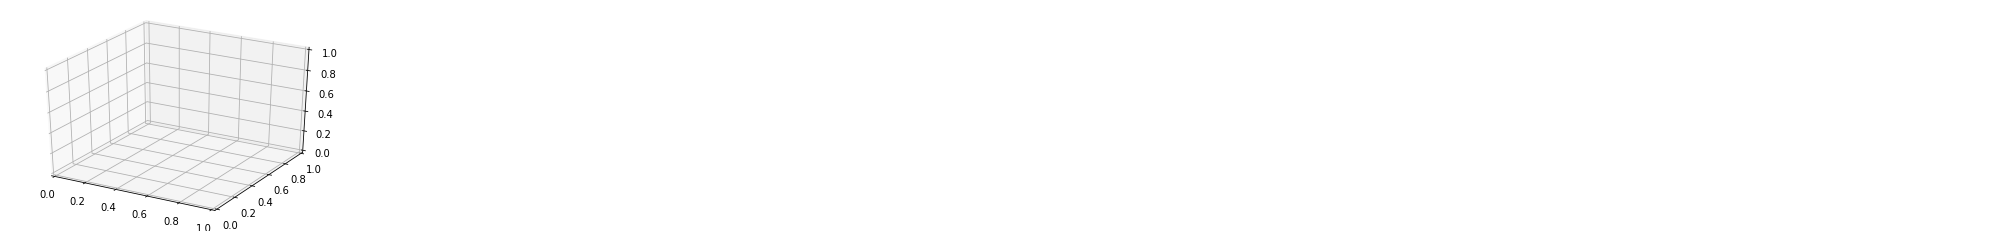

In [3]:
fig = plt.figure()
ax = plt.axes(projection='3d')

With this three-dimensional axes enabled, we can now plot a variety of three-dimensional plot types. 
Three-dimensional plotting is one of the functionalities that benefits immensely from viewing figures interactively rather than statically in the notebook; recall that to use interactive figures, you can use ``%matplotlib notebook`` rather than ``%matplotlib inline`` when running this code.

## Three-dimensional Points and Lines

The most basic three-dimensional plot is a line or collection of scatter plot created from sets of (x, y, z) triples.
In analogy with the more common two-dimensional plots discussed earlier, these can be created using the ``ax.plot3D`` and ``ax.scatter3D`` functions.
Here we'll plot a trigonometric spiral, along with some points drawn randomly near the line:

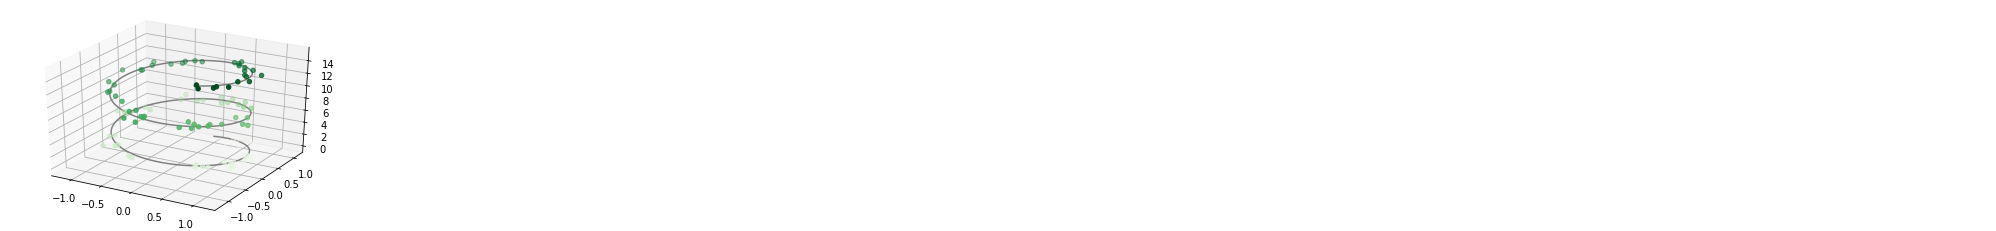

In [9]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

Notice that by default, the scatter points have their transparency adjusted to give a sense of depth on the page.
While the three-dimensional effect is sometimes difficult to see within a static image, an interactive view can lead to some nice intuition about the layout of the points.

## Three-dimensional Contour Plots

Analogous to the contour plots, ``mplot3d`` contains tools to create three-dimensional relief plots using the same inputs.
Like two-dimensional ``ax.contour`` plots, ``ax.contour3D`` requires all the input data to be in the form of two-dimensional regular grids, with the Z data evaluated at each point.
Here we'll show a three-dimensional contour diagram of a three-dimensional sinusoidal function:

In [10]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

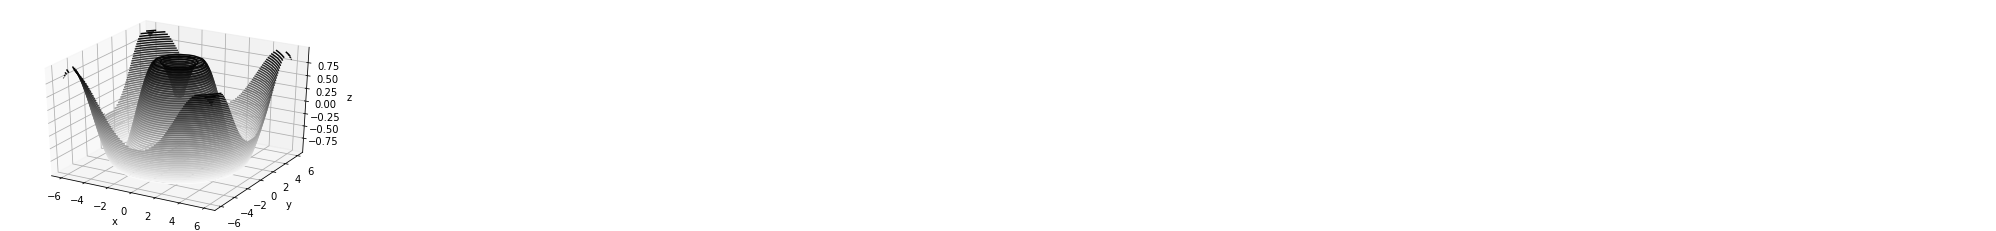

In [11]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

Sometimes the default viewing angle is not optimal, in which case we can use the ``view_init`` method to set the elevation and azimuthal angles. In the following example, we'll use an elevation of 60 degrees (that is, 60 degrees above the x-y plane) and an azimuth of 35 degrees (that is, rotated 35 degrees counter-clockwise about the z-axis):

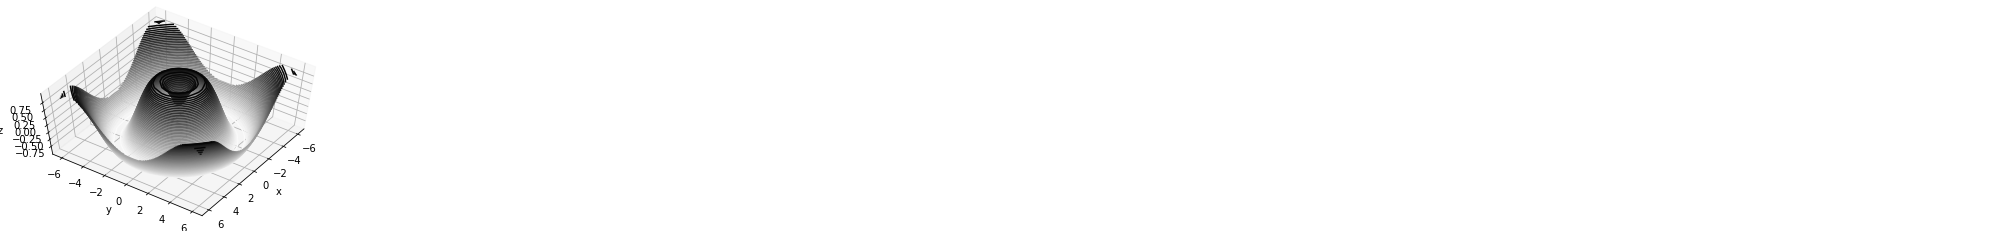

In [12]:
ax.view_init(60, 35)
fig

Again, note that this type of rotation can be accomplished interactively by clicking and dragging when using one of Matplotlib's interactive backends.

## Wireframes and Surface Plots

Two other types of three-dimensional plots that work on gridded data are wireframes and surface plots.
These take a grid of values and project it onto the specified three-dimensional surface, and can make the resulting three-dimensional forms quite easy to visualize.
Here's an example of using a wireframe:

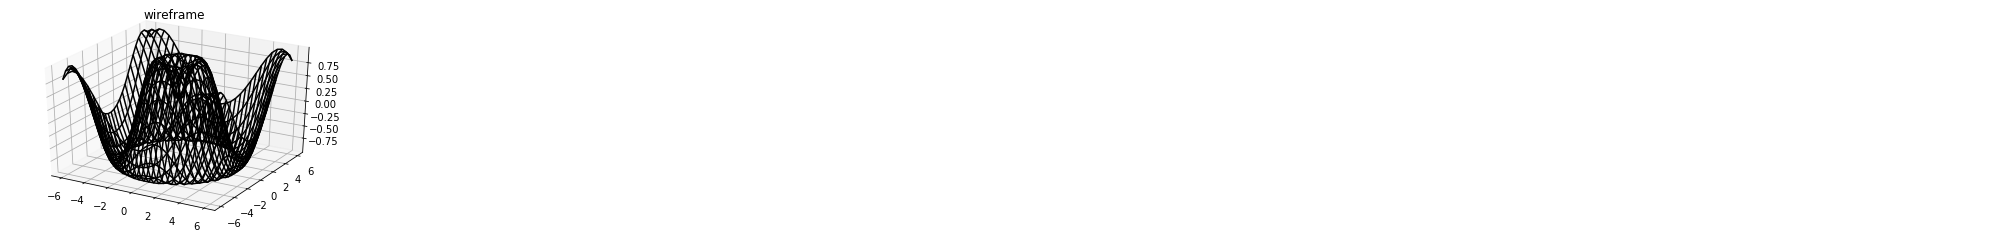

In [13]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe');

A surface plot is like a wireframe plot, but each face of the wireframe is a filled polygon.
Adding a colormap to the filled polygons can aid perception of the topology of the surface being visualized:

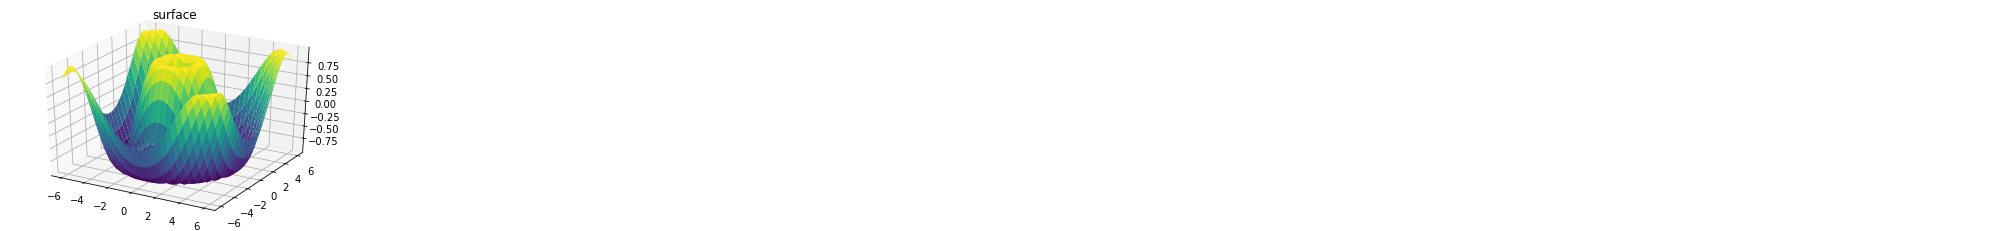

In [14]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

Note that though the grid of values for a surface plot needs to be two-dimensional, it need not be rectilinear.
Here is an example of creating a partial polar grid, which when used with the ``surface3D`` plot can give us a slice into the function we're visualizing:

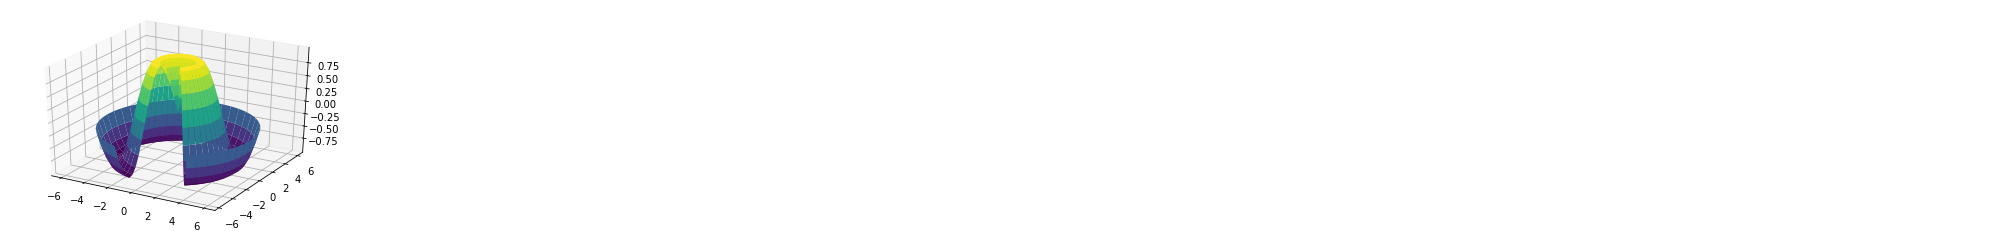

In [15]:
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none');

## Surface Triangulations

For some applications, the evenly sampled grids required by the above routines is overly restrictive and inconvenient.
In these situations, the triangulation-based plots can be very useful.
What if rather than an even draw from a Cartesian or a polar grid, we instead have a set of random draws?

In [ ]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)

We could create a scatter plot of the points to get an idea of the surface we're sampling from:

In [ ]:
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);

This leaves a lot to be desired.
The function that will help us in this case is ``ax.plot_trisurf``, which creates a surface by first finding a set of triangles formed between adjacent points (remember that x, y, and z here are one-dimensional arrays):

In [ ]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z,
                cmap='viridis', edgecolor='none');

The result is certainly not as clean as when it is plotted with a grid, but the flexibility of such a triangulation allows for some really interesting three-dimensional plots.
For example, it is actually possible to plot a three-dimensional Möbius strip using this, as we'll see next.

### Example: Visualizing a Möbius strip

A Möbius strip is similar to a strip of paper glued into a loop with a half-twist.
Topologically, it's quite interesting because despite appearances it has only a single side!
Here we will visualize such an object using Matplotlib's three-dimensional tools.
The key to creating the Möbius strip is to think about it's parametrization: it's a two-dimensional strip, so we need two intrinsic dimensions. Let's call them $\theta$, which ranges from $0$ to $2\pi$ around the loop, and $w$ which ranges from -1 to 1 across the width of the strip:

In [ ]:
theta = np.linspace(0, 2 * np.pi, 30)
w = np.linspace(-0.25, 0.25, 8)
w, theta = np.meshgrid(w, theta)

Now from this parametrization, we must determine the *(x, y, z)* positions of the embedded strip.

Thinking about it, we might realize that there are two rotations happening: one is the position of the loop about its center (what we've called $\theta$), while the other is the twisting of the strip about its axis (we'll call this $\phi$). For a Möbius strip, we must have the strip makes half a twist during a full loop, or $\Delta\phi = \Delta\theta/2$.

In [ ]:
phi = 0.5 * theta

Now we use our recollection of trigonometry to derive the three-dimensional embedding.
We'll define $r$, the distance of each point from the center, and use this to find the embedded $(x, y, z)$ coordinates:

In [ ]:
# radius in x-y plane
r = 1 + w * np.cos(phi)

x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))

Finally, to plot the object, we must make sure the triangulation is correct. The best way to do this is to define the triangulation *within the underlying parametrization*, and then let Matplotlib project this triangulation into the three-dimensional space of the Möbius strip.
This can be accomplished as follows:

In [ ]:
# triangulate in the underlying parametrization
from matplotlib.tri import Triangulation
tri = Triangulation(np.ravel(w), np.ravel(theta))

ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles,
                cmap='viridis', linewidths=0.2);

ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1);